In [3]:
import numpy as np
import pandas as pd
from astropy.table import Table
import scipy.optimize

In [4]:
#Read
data_table = Table.read('GlobalCCl4MM.dat', format='ascii')

#Convert
data_df = data_table.to_pandas()

data_df.head()
data_df.columns

Index(['CCl4ottoyr', 'CCl4ottomon', 'CCl4ottoNHm', 'CCl4ottoNHsd',
       'CCl4ottoSHm', 'CCl4ottoSHsd', 'CCl4ottoGLm', 'CCl4ottoGLsd'],
      dtype='object')

In [5]:
data_df['Date'] = pd.to_datetime({'year': data_df['CCl4ottoyr'], 
                                  'month': data_df['CCl4ottomon'], 
                                  'day': 1})

regression_df = data_df[['Date', 'CCl4ottoGLm', 'CCl4ottoGLsd']].copy()
regression_df.columns = ['Date', 'Concentration', 'Concentration_SD']
regression_df.dropna(subset=['Concentration'], inplace=True)

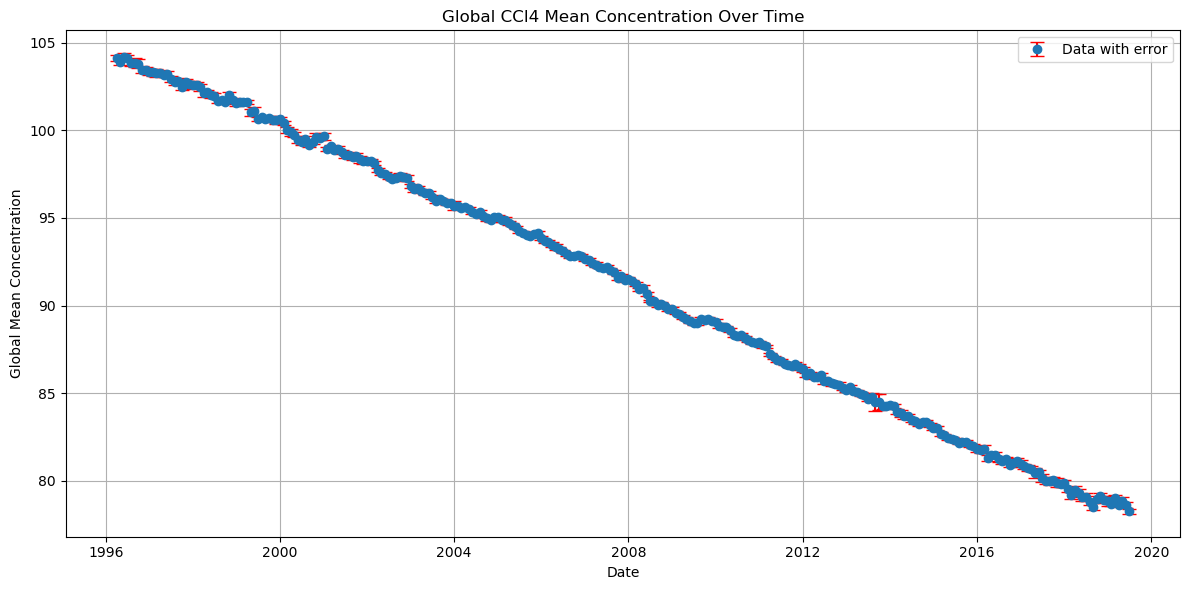

In [10]:
#Plot
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12,6))
plt.errorbar(regression_df['Date'], regression_df['Concentration'], yerr=regression_df['Concentration_SD'], fmt = 'o', ecolor='red', label='Data with error', capsize=5)

plt.title('Global CCl4 Mean Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('Global Mean Concentration')

plt.legend()

plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
#Fit Model

regression_df['DateNumerical'] = (regression_df['Date'] - regression_df['Date'].min()).dt.days

slope, intercept = np.polyfit(regression_df['DateNumerical'], regression_df['Concentration'], 1)
parameters, covariance = np.polyfit(regression_df['DateNumerical'], regression_df['Concentration'], 1, cov=True)

slope_error, intercept_error = np.sqrt(np.diag(covariance))

print(f"Slope: {slope}, Slope Error: {slope_error}")
print(f"Intercept: {intercept}, Intercept Error: {intercept_error}]")

Slope: -0.003137731383493634, Slope Error: 6.036347909255946e-06
Intercept: 104.61571397712935, Intercept Error: 0.029621946253073166]


In [16]:
# Reduced Chi-Squared

predicted_concentrations = intercept + slope * regression_df['DateNumerical']

residuals = regression_df['Concentration'] - predicted_concentrations

chi_squared = np.sum((residuals / regression_df['Concentration_SD'])**2)

reduced_chi_squared = chi_squared / (len(regression_df) - 2)

print(f"Chi-squared value: {chi_squared}")
print(f"Reduced chi-squared value: {reduced_chi_squared}")

Chi-squared value: 1282.6221298839826
Reduced chi-squared value: 4.613748668647419


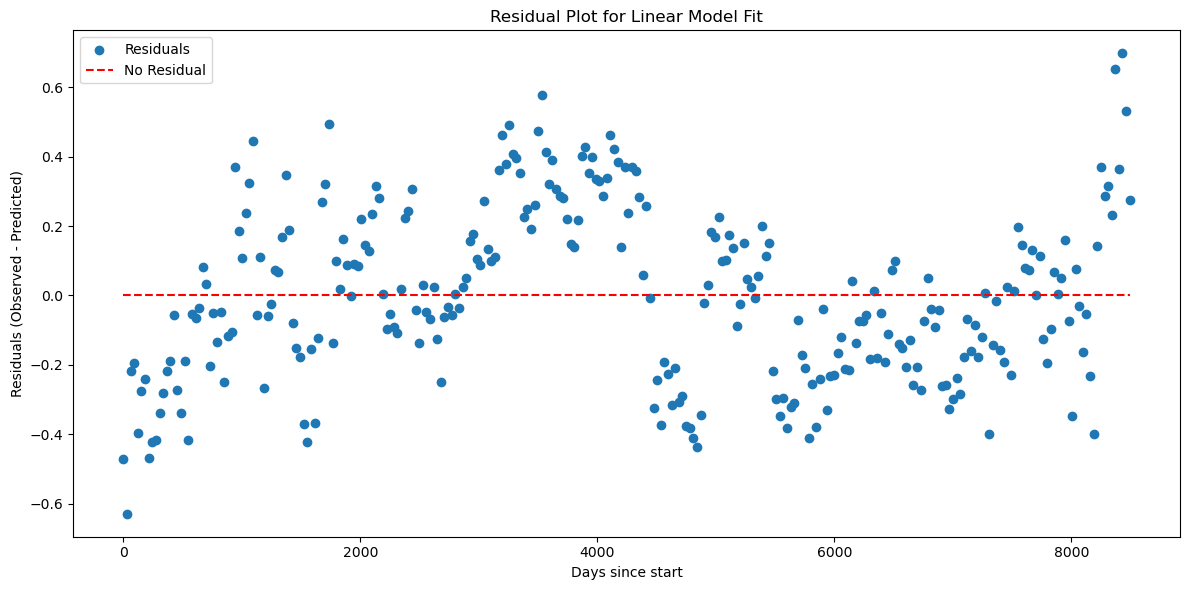

In [17]:
# Residual plot

plt.figure(figsize=(12, 6))
plt.scatter(regression_df['DateNumerical'], residuals, label='Residuals')
plt.hlines(y=0, xmin=min(regression_df['DateNumerical']), xmax=max(regression_df['DateNumerical']), 
           color='r', linestyles='dashed', label='No Residual')

# Add labels and title
plt.xlabel('Days since start')
plt.ylabel('Residuals (Observed - Predicted)')
plt.title('Residual Plot for Linear Model Fit')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
# A linear fit may be appropriate, but it seems that there is a slight sinusoidal pattern in the residual plot.